<a href="https://colab.research.google.com/github/akhilnooney/Akhil/blob/master/g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.2.0
!pip install eli5

     |████████████████████████████████| 112kB 7.9MB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import pandas as pd
df=pd.read_csv("/content/sample_data/nsclc_boston_data.csv")
#Performing Label Encoding
replace_smoker_region={'Outcome':{'Alive':1,'Dead':0},"Stage":{"1B":1,"IA":1,"IB":2,"IIA":3,"IIB":4,"IIIA":5,"IIIB":6,"IV":7,"IVB":8}}
df1=df.replace(replace_smoker_region)
dfDummies = pd.get_dummies(df1['Histology'], prefix = 'category')
df1= pd.concat([df1, dfDummies], axis=1)

In [ ]:
df["Stage"].value_counts()

IV      45
IIIA    43
IA      32
IVB     25
IIIB    24
IIB     11
IIA      8
1B       1
IB       1
Name: Stage, dtype: int64

In [ ]:
df["T"]

0      UNK
1      UNK
2        2
3       1a
4      UNK
      ... 
185      4
186      3
187      3
188     1a
189     2a
Name: T, Length: 190, dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'Dead'), Text(0, 0, 'Alive')]

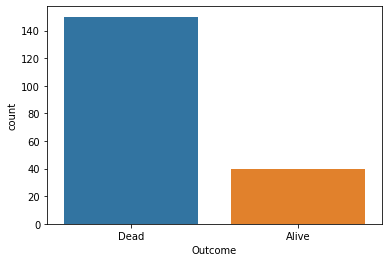

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Outcome", data=df1)
ax.set_xticklabels(["Dead","Alive"])

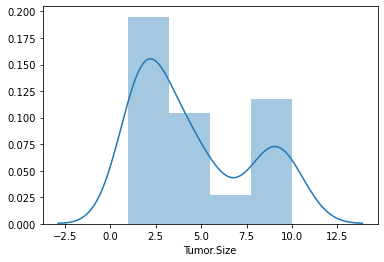

In [ ]:
sns.distplot(df1["Tumor.Size"])

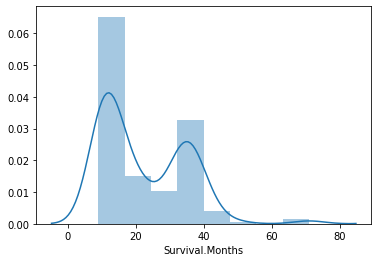

In [ ]:
sns.distplot(df1['Survival.Months'])

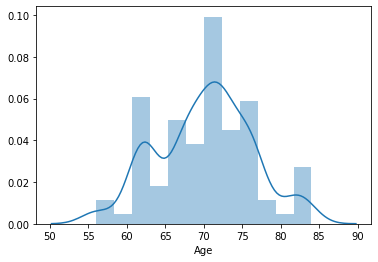

In [ ]:
sns.distplot(df1["Age"])

Correlation_Coefficient 
 
 ID                                 -0.008238
Outcome                             1.000000
Survival.Months                     0.200126
Age                                 0.195949
Grade                              -0.264501
Num.Primaries                       0.276045
N                                  -0.169614
M                                   0.011495
Radiation                           0.102473
Stage                              -0.239580
Tumor.Size                         -0.275870
Num.Mutated.Genes                   0.129691
Num.Mutations                       0.134441
category_Adenocarcinoma            -0.210223
category_Large-cell carcinoma      -0.173196
category_Squamous cell carcinoma    0.336315
Name: Outcome, dtype: float64


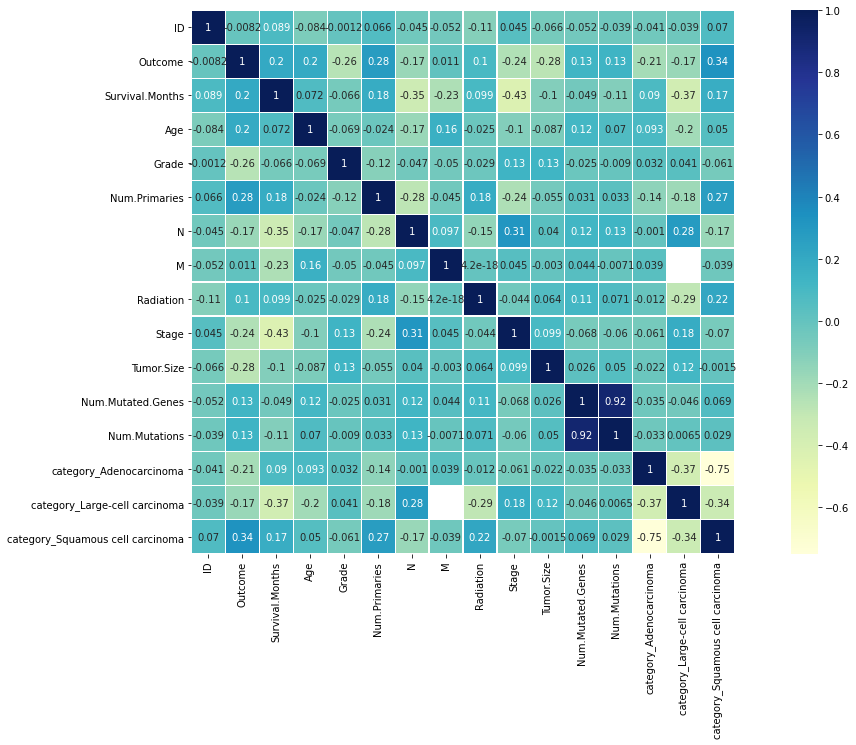

In [ ]:
#Correlation Coefficient
#converted all rows to float
import matplotlib.pyplot as plt
df1[["Survival.Months","Age","Grade","Num.Primaries","Radiation","Stage","Num.Mutated.Genes","Num.Mutations"]]=df1[["Survival.Months","Age","Grade","Num.Primaries","Radiation","Stage","Num.Mutated.Genes","Num.Mutations"]].astype(float)
print(f"Correlation_Coefficient \n \n {df1.corr()['Outcome']}")
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,square=True,cmap="YlGnBu",linewidths=0.10,linecolor='white')

In [ ]:
df

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Gene
0,1,Alive,9.0,67,4,0,UNK,2.0,NaN,0,IV,Left Lower Lobe,Squamous cell carcinoma,1.4,8,8,AKT1-STK11-PDGFRB-EGFR-TSC2-CCND2-FGFR3-KRAS_Col1
1,2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,NaN,2,2,SMO-TP53_Col1
2,3,Dead,13.0,72,3,0,2,2.0,0.0,0,IIIA,Right Upper Lobe,Adenocarcinoma,1.5,1,1,STK11
3,4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,NaN,4,4,TP53_Col1-CDKN2A-PIK3CB-MET
4,5,Dead,10.0,76,9,0,UNK,NaN,NaN,0,IIIA,Left Hilar,Large-cell carcinoma,NaN,3,3,KRAS_Col1-TP53_Col1-TSC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,Dead,32.0,82,9,0,4,0.0,1.0,0,IIIB,Right Upper Lobe,Squamous cell carcinoma,9.0,2,2,PTEN-NF_Col3
186,187,Dead,10.0,62,4,0,3,2.0,NaN,0,IVB,Left Hilar,Large-cell carcinoma,NaN,3,5,TSC2-KRAS_Col1-MSH2
187,188,Dead,23.0,72,3,0,3,NaN,NaN,0,IA,Right Upper Lobe,Squamous cell carcinoma,2.0,3,3,CDKN2A-MET-TP53_Col1
188,189,Dead,32.0,67,4,1,1a,NaN,0.0,0,IV,Right Upper Lobe,Adenocarcinoma,10.0,3,3,CDKN2A-TP53_Col1-FBXW7


In [ ]:
df1.isnull().sum(axis = 0)

ID                                   0
Outcome                              0
Survival.Months                      0
Age                                  0
Grade                                0
Num.Primaries                        0
T                                    0
N                                   65
M                                   96
Radiation                            0
Stage                                0
Primary.Site                         0
Histology                            0
Tumor.Size                          92
Num.Mutated.Genes                    0
Num.Mutations                        0
Gene                                 6
category_Adenocarcinoma              0
category_Large-cell carcinoma        0
category_Squamous cell carcinoma     0
dtype: int64

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df2=df1.drop(["ID","T","Primary.Site","Histology","Gene","N","M","Tumor.Size"],axis=1)
X=df2.iloc[:,1:]
Y=df2['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
rf =RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= True,criterion='gini',max_depth=10,min_samples_leaf= 1).fit(X_train,Y_train)
feature_imp=PermutationImportance(rf, random_state=1).fit(X_train,Y_train)
columns=X_train.columns.tolist()
eli5.show_weights(feature_imp,feature_names=columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.1102 ± 0.0173,Survival.Months
0.0504 ± 0.0161,Age
0.0457 ± 0.0118,Stage
0.0346 ± 0.0214,category_Squamous cell carcinoma
0.0252 ± 0.0118,Num.Primaries
0.0126 ± 0.0126,category_Adenocarcinoma
0.0126 ± 0.0161,Num.Mutations
0.0126 ± 0.0126,Grade
0.0063 ± 0.0118,Radiation
0.0047 ± 0.0077,Num.Mutated.Genes


In [ ]:
#KNN Algoritham
from sklearn.neighbors import KNeighborsClassifier
df5=df1.drop(["ID","T","Primary.Site","Histology"],axis=1)
X=df2.iloc[:,1:].values
Y=df2['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')#Model building
knn_model.fit(X_train,Y_train)#Model Fitting
prediction=knn_model.predict(X_test)#Model Prediction

In [ ]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
cross_validation_scores = []
neighbors = list(np.arange(2,50,1))
for value in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = value, metric='euclidean')
    scores = cross_validate(knn_model,X_train, Y_train, cv = 10)
    cross_validation_scores .append(scores["test_score"].mean())
error = [1-x for x in cross_validation_scores]
optimal_k = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k, metric='euclidean')
knn_optimal.fit(X_train, Y_train)
y_prediction = knn_optimal.predict(X_test)
accuracy = accuracy_score(Y_test, y_prediction)
print(f"Accuracy Score : {round((accuracy)*100)}")
print("The accuracy for optimal k = {0} using euclidean is {1}".format(optimal_k, accuracy))

Accuracy Score : 76.0
The accuracy for optimal k = 5 using euclidean is 0.7619047619047619


In [ ]:
confusion_matrix(Y_test, prediction)


array([[47,  5],
       [10,  1]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.17      0.09      0.12        11

    accuracy                           0.76        63
   macro avg       0.50      0.50      0.49        63
weighted avg       0.71      0.76      0.73        63



In [ ]:
#XGBOOST
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 8,
 'min_child_weight': 1}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.3, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [ ]:
score

array([0.94736842, 0.84210526, 0.78947368, 0.78947368, 0.78947368,
       1.        , 0.73684211, 1.        , 0.89473684, 0.84210526])

In [ ]:
score.mean()

0.8631578947368421

In [ ]:
#Oversampling Technique
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler(ratio=1)

In [ ]:
X_train_res, y_train_res = os.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

X_train_res.shape,y_train_res.shape

((300, 11), (300,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 150, 1: 40})
Resampled dataset shape Counter({1: 150, 0: 150})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_train_res,y_train_res,test_size=0.33)#Train,Test split
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')#Model building
knn_model.fit(X_trains,Y_trains)#Model Fitting
prediction=knn_model.predict(X_tests)#Model Prediction

In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
cross_validation_scores = []
neighbors = list(np.arange(2,50,1))
for value in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = value, metric='euclidean')
    scores = cross_validate(knn_model,X_trains, Y_trains, cv = 10)
    cross_validation_scores .append(scores["test_score"].mean())
error = [1-x for x in cross_validation_scores]
optimal_k = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k, metric='euclidean')
knn_optimal.fit(X_trains, Y_trains)
y_prediction = knn_optimal.predict(X_tests)
accuracy = accuracy_score(Y_tests, y_prediction)
print(f"Accuracy Score : {round((accuracy)*100)}")
print("The accuracy for optimal k = {0} using euclidean is {1}".format(optimal_k, accuracy))

Accuracy Score : 89.0
The accuracy for optimal k = 3 using euclidean is 0.8888888888888888


In [ ]:
#XGBoost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 3}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.4, learning_rate=0.15,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_res,y_train_res,cv=10)

In [ ]:
score

array([1.        , 0.96666667, 0.9       , 1.        , 0.9       ,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [ ]:
df["Survival.Months"]

0       9.0
1      19.0
2      13.0
3      15.0
4      10.0
       ... 
185    32.0
186    10.0
187    23.0
188    32.0
189    33.0
Name: Survival.Months, Length: 190, dtype: float64

In [ ]:
score.mean()

0.97

In [ ]:
df1

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Gene,category_Adenocarcinoma,category_Large-cell carcinoma,category_Squamous cell carcinoma
0,1,1,9.0,67.0,4.0,0.0,UNK,2.0,NaN,0.0,7.0,Left Lower Lobe,Squamous cell carcinoma,1.4,8.0,8.0,AKT1-STK11-PDGFRB-EGFR-TSC2-CCND2-FGFR3-KRAS_Col1,0,0,1
1,2,0,19.0,73.0,2.0,0.0,UNK,2.0,0.0,5.0,7.0,Right Upper Lobe,Adenocarcinoma,NaN,2.0,2.0,SMO-TP53_Col1,1,0,0
2,3,0,13.0,72.0,3.0,0.0,2,2.0,0.0,0.0,5.0,Right Upper Lobe,Adenocarcinoma,1.5,1.0,1.0,STK11,1,0,0
3,4,0,15.0,69.0,9.0,1.0,1a,0.0,1.0,0.0,1.0,Right Upper Lobe,Adenocarcinoma,NaN,4.0,4.0,TP53_Col1-CDKN2A-PIK3CB-MET,1,0,0
4,5,0,10.0,76.0,9.0,0.0,UNK,NaN,NaN,0.0,5.0,Left Hilar,Large-cell carcinoma,NaN,3.0,3.0,KRAS_Col1-TP53_Col1-TSC2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,0,32.0,82.0,9.0,0.0,4,0.0,1.0,0.0,6.0,Right Upper Lobe,Squamous cell carcinoma,9.0,2.0,2.0,PTEN-NF_Col3,0,0,1
186,187,0,10.0,62.0,4.0,0.0,3,2.0,NaN,0.0,8.0,Left Hilar,Large-cell carcinoma,NaN,3.0,5.0,TSC2-KRAS_Col1-MSH2,0,1,0
187,188,0,23.0,72.0,3.0,0.0,3,NaN,NaN,0.0,1.0,Right Upper Lobe,Squamous cell carcinoma,2.0,3.0,3.0,CDKN2A-MET-TP53_Col1,0,0,1
188,189,0,32.0,67.0,4.0,1.0,1a,NaN,0.0,0.0,7.0,Right Upper Lobe,Adenocarcinoma,10.0,3.0,3.0,CDKN2A-TP53_Col1-FBXW7,1,0,0


In [ ]:
import pandas as pd
df=pd.read_csv("/content/sample_data/nsclc_boston_data.csv")
#Performing Label Encoding
replace_smoker_region={'Outcome':{'Alive':1,'Dead':0},"Stage":{"1B":1,"IA":1,"IB":2,"IIA":3,"IIB":4,"IIIA":5,"IIIB":6,"IV":7,"IVB":8}}
df1=df.replace(replace_smoker_region)
#dfDummies = pd.get_dummies(df1['Histology'], prefix = 'category')
#df1= pd.concat([df1, dfDummies], axis=1)
df2=df1.drop(["ID","T","N","M","Tumor.Size","Gene","Primary.Site","Histology"],axis=1)
X=df2.iloc[:,1:].values
Y=df2['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split

In [ ]:
X_train

array([[32., 67.,  4., ...,  7.,  3.,  3.],
       [36., 72.,  9., ...,  4.,  1.,  1.],
       [11., 76.,  9., ...,  8.,  2.,  2.],
       ...,
       [ 9., 77.,  4., ...,  7.,  3.,  3.],
       [36., 67.,  9., ...,  4.,  4.,  6.],
       [32., 82.,  9., ...,  6.,  2.,  2.]])

In [ ]:
from sklearn import preprocessing
# Get column names first
names = df2.iloc[:,1:].columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df2.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df=pd.concat([scaled_df,df2['Outcome']],axis=1)

In [ ]:
scaled_df

,Survival.Months,Age,Grade,Num.Primaries,Radiation,Stage,Num.Mutated.Genes,Num.Mutations,Outcome
0,-1.064536,-0.517670,-0.704667,-0.540848,-0.704317,0.807755,3.649755,2.903423,1
1,-0.257265,0.461009,-1.374100,-0.540848,1.419814,0.807755,-0.469770,-0.640369,0
2,-0.741627,0.297896,-1.039383,-0.540848,-0.704317,-0.061783,-1.156358,-1.231002,0
3,-0.580173,-0.191443,0.968917,1.848947,-0.704317,-1.800859,0.903405,0.540895,0
4,-0.983809,0.950349,0.968917,-0.540848,-0.704317,-0.061783,0.216817,-0.049737,0
...,...,...,...,...,...,...,...,...,...
185,0.792188,1.929028,0.968917,-0.540848,-0.704317,0.372986,-0.469770,-0.640369,0
186,-0.983809,-1.333236,-0.704667,-0.540848,-0.704317,1.242524,0.216817,1.131527,0
187,0.065644,0.297896,-1.039383,-0.540848,-0.704317,-1.800859,0.216817,-0.049737,0
188,0.792188,-0.517670,-0.704667,1.848947,-0.704317,0.807755,0.216817,-0.049737,0


In [ ]:
#Normalization
from sklearn import preprocessing
names = df2.iloc[:,1:].columns
norm=preprocessing.normalize(df2.iloc[:,1:])
norm_df = pd.DataFrame(norm, columns=names)
norm_df=pd.concat([norm_df,df2['Outcome']],axis=1)

In [ ]:
#GAN Model Implimentation

In [ ]:
#Generator
def build_generator(latent_dim, n_outputs=8):
	model = Sequential()
	model.add(Dense(10, activation=LeakyReLU(alpha=0.2), kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(BatchNormalization(momentum=0.8))
	model.add(Dense(32,activation=LeakyReLU(alpha=0.2)))
	model.add(BatchNormalization(momentum=0.8))
	model.add(Dense(n_outputs,activation="relu"))
	return model

def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	# Avg=df["Grade"].mean()
	# Sd=df["Grade"].std()
	# s = np.random.normal(Avg, Sd, latent_dim*n)
	#s=np.random.normal(Avg,Sd, (n,latent_dim))
	noise = np.random.normal(0, 1, (n,latent_dim))
	#s=pd.DataFrame(s,columns=["data"])
	#scaler = MinMaxScaler(feature_range=(0, 1))
	#normal_array = scaler.fit_transform(s)
	# reshape into a batch of inputs for the network
	#x_input = s.reshape(n, latent_dim)
	return noise

def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	y = zeros((n, 1))
	# predict outputs
	predicted=generator.predict(x_input)
	#predicted=(predicted + 1) / 2.0
	#scaler = MinMaxScaler(feature_range=(0, 1))
	transformed_x=scaler.inverse_transform(predicted)
	#transformed_x=transformed_x * (-1)
	return transformed_x,y

	


In [ ]:
# size of the latent space
from keras.models import Sequential,Model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout
from keras.utils.vis_utils import plot_model
from numpy.random import randn
from matplotlib import pyplot
from numpy import zeros
from keras.layers import Input
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
import numpy as np
latent_dim = 10
model = build_generator(latent_dim)
# model.summary()
# # generate and plot generated samples
x,y=generate_fake_samples(model, latent_dim,1000)

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [ ]:
#Discriminator
def build_discriminator(data_dim,num_classes):
    model = Sequential()
    model.add(Dense(31,input_dim=data_dim,kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.25))
    model.add(Dense(65))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Dense(num_classes, activation="sigmoid"))
    model.summary()
    #Functional layer for creating two models
    img = Input(shape=(data_dim,))
    features = model(img)
    #Model to predict fake or real sample
    valid = Dense(1, activation="sigmoid")(features)
    d_model = Model(img, valid)
    d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    #To predict class label
    label = Dense(num_classes, activation="softmax")(features)
    c_model=Model(img,label)
    c_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return c_model,d_model
    

In [ ]:
x

array([[23.46563  , 70.67954  ,  6.105263 , ...,  5.142105 ,  2.6842105,
         3.1214352],
       [22.186842 , 70.17368  ,  8.005098 , ...,  5.142105 ,  2.6842105,
         3.75821  ],
       [29.001814 , 72.57208  ,  9.623362 , ...,  5.142105 ,  2.6842105,
         3.8625872],
       ...,
       [22.186842 , 70.17368  ,  6.105263 , ...,  5.142105 ,  2.6842105,
         4.4803963],
       [22.186842 , 75.62948  ,  6.105263 , ...,  5.142105 ,  2.6842105,
         3.6167548],
       [22.186842 , 70.17368  ,  6.105263 , ...,  5.142105 ,  2.6842105,
         3.8336341]], dtype=float32)

In [ ]:
df1

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Gene
0,1,1,9.0,67,4,0,UNK,2.0,NaN,0,7,Left Lower Lobe,Squamous cell carcinoma,1.4,8,8,AKT1-STK11-PDGFRB-EGFR-TSC2-CCND2-FGFR3-KRAS_Col1
1,2,0,19.0,73,2,0,UNK,2.0,0.0,5,7,Right Upper Lobe,Adenocarcinoma,NaN,2,2,SMO-TP53_Col1
2,3,0,13.0,72,3,0,2,2.0,0.0,0,5,Right Upper Lobe,Adenocarcinoma,1.5,1,1,STK11
3,4,0,15.0,69,9,1,1a,0.0,1.0,0,1,Right Upper Lobe,Adenocarcinoma,NaN,4,4,TP53_Col1-CDKN2A-PIK3CB-MET
4,5,0,10.0,76,9,0,UNK,NaN,NaN,0,5,Left Hilar,Large-cell carcinoma,NaN,3,3,KRAS_Col1-TP53_Col1-TSC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,0,32.0,82,9,0,4,0.0,1.0,0,6,Right Upper Lobe,Squamous cell carcinoma,9.0,2,2,PTEN-NF_Col3
186,187,0,10.0,62,4,0,3,2.0,NaN,0,8,Left Hilar,Large-cell carcinoma,NaN,3,5,TSC2-KRAS_Col1-MSH2
187,188,0,23.0,72,3,0,3,NaN,NaN,0,1,Right Upper Lobe,Squamous cell carcinoma,2.0,3,3,CDKN2A-MET-TP53_Col1
188,189,0,32.0,67,4,1,1a,NaN,0.0,0,7,Right Upper Lobe,Adenocarcinoma,10.0,3,3,CDKN2A-TP53_Col1-FBXW7


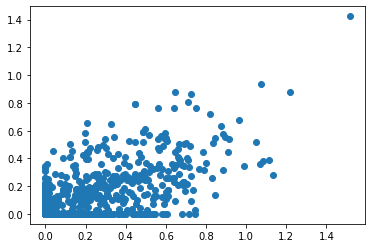

In [ ]:
value = np.random.rand(80)
pyplot.scatter(x[:, 0],x[:, 1])

In [ ]:
dis=build_discriminator(8,2)
dis[0].summary()
dis[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 31)                279       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 31)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 31)                124       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 65)                2080      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 65)                0         
Total params: 2,483
Trainable params: 2,421
Non-trainable params: 62
___________________________________________________

In [ ]:
#Creating Model to combine Generator and Discriminator model
from keras.models import Sequential
from keras.layers import Dense
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  gan_output = discriminator(generator.output)
  model = Model(generator.input, gan_output)
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
  return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
c_model,discriminator = build_discriminator(8,2)
# create the generator
generator = build_generator(latent_dim)
# create the gan
gan_model = define_gan(generator,discriminator)
# summarize gan model
gan_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 31)                279       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 31)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 31)                124       
_________________________________________________________________
dropout_2 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 65)                2080      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 65)                0         
Total params: 2,483
Trainable params: 2,421
Non-trainable params: 62
___________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [ ]:
from sklearn.utils import shuffle
from numpy import ones
#Supervised Learning
def input_sample_real(data,n_samples):
    half_samples=int(n_samples/2)
    sampling=data[data['Outcome']==0]
    rand_0=sampling.sample(half_samples)
    sample_1=data[data['Outcome']==1]
    rand_1=sampling.sample(half_samples)
    combined_df=pd.concat([rand_1,rand_0])
    final_df=shuffle(combined_df)
    X=final_df.iloc[:,:8]
    Y=final_df["Outcome"]
    Discriminator_label=ones((n_samples, 1))
    return [X,Y],Discriminator_label


In [ ]:
def summarize_performance(step, g_model,d_model,c_model, latent_dim, dataset,n_samples,fake_sam,X_t,Y_t):
  [x_real, y_real],dis_label = input_sample_real(norm_df.iloc[:,:9],n_samples)
  loss_real, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
  # prepare fake examples
  X, Y = generate_fake_samples(g_model, latent_dim,fake_sam)
  _, acc = c_model.evaluate(X_t, Y_t, verbose=0)
  print('Classifier Accuracy: %.3f%%' % (acc * 100))
  #gan_model=g_model.save('g_model_%04d.h5'% (step+1))
  #dc_model=c_model.save('c_model_%04d.h5'% (step+1))
  _,acc=d_model.evaluate(X,Y,verbose=0)
  print('Dis Accuracy on fake data :%.3f%%' % (acc * 100))
  # scale from [-1,1] to [0,1]
  #X = (X + 1) / 2.0
  # evaluate the classifier model
  print(X)
  # [X, y],dis_label = input_sample_real(df2.iloc[:,:2],80)
  # _, acc = c_model.evaluate(X, y, verbose=0)
  # real_values=np.random.rand(n_samples)
  # fake_values=np.random.rand(n_samples)
  #pyplot.scatter(x_real[:, 0], x_real[:, 1],color='red')
  #pyplot.scatter(X[:, 0],X[:, 1],color='blue')
  # pyplot.show()

  

  # acc_list.append(acc)
  # print('Classifier Accuracy: %.3f%%' % (acc * 100))
  # # save the generator model
  # filename2 = 'g_model_%04d.h5' % (step+1)
  # g_model.save(filename2)
  # # save the classifier model
  # filename3 = 'c_model_%04d.h5' % (step+1)
  # c_model.save(filename3)
  # print('>Saved:  %s and %s' % (filename2, filename3))

In [ ]:
def train(g_model, d_model, gan_model,c_model,latent_dim,X,Y,n_epochs=5000, n_batch=160,n_eval=2):
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)
  dataset=norm_df.iloc[:,:9]
  #dataset=df2[["Outcome","Grade"]]
  # manually enumerate epochs
  gan_loss=[]
  dis_loss=[]
  for i in range(n_epochs):
      [Xsup_real, ysup_real],dis_label= input_sample_real(norm_df.iloc[:,:9],half_batch)
      c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
      [X_real, _], y_real = input_sample_real(norm_df.iloc[:,:9],half_batch)
      d_loss1,_ = d_model.train_on_batch(X_real, y_real)
      #Generate Fake samples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      d_loss2,_ = d_model.train_on_batch(X_fake, y_fake)
      # update generator (g)
      X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      #print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))
      print(f'{i+1},c {c_loss,c_acc*100},d {d_loss1,d_loss2},g {g_loss}')
      gan_loss.append(g_loss)
      dis_loss.append(d_loss2)
      if (i+1) % (500) == 0:
        summarize_performance(i, g_model,d_model,c_model, latent_dim, dataset,half_batch,1000,X,Y)
  return gan_loss,dis_loss

In [ ]:
# size of the latent spae,
latent_dim = 10
# create the discriminator
c_model,discriminator = build_discriminator(8,2)
# create the generator
generator = build_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
X,Y=X_train,Y_train
gan,dis=train(generator, discriminator, gan_model,c_model,latent_dim,X,Y)
X,Y=X_train,Y_train

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 31)                279       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 31)                0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 31)                124       
_________________________________________________________________
dropout_3 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 65)                2080      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 65)                0         
Total params: 2,483
Trainable params: 2,421
Non-trainable params: 62
___________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
98,c (0.22959319, 98.7500011920929),d (0.5402489, 0.64275235),g 0.8939163088798523
99,c (0.22272265, 98.7500011920929),d (0.5352667, 0.6341265),g 0.8633109331130981
100,c (0.21040027, 98.7500011920929),d (0.5452081, 0.61242914),g 0.8506758809089661
101,c (0.24193215, 98.7500011920929),d (0.5258869, 0.6078681),g 0.9113094210624695
102,c (0.19756818, 100.0),d (0.5347779, 0.6387914),g 0.8145147562026978
103,c (0.22235708, 97.50000238418579),d (0.5030821, 0.63495827),g 0.8762506246566772
104,c (0.22434458, 97.50000238418579),d (0.5251945, 0.6628727),g 0.8887909054756165
105,c (0.21917453, 98.7500011920929),d (0.50394905, 0.6278943),g 0.8796571493148804
106,c (0.2271378, 97.50000238418579),d (0.5275117, 0.62821096),g 0.8511684536933899
107,c (0.19170403, 100.0),d (0.5344971, 0.6194584),g 0.8471239805221558
108,c (0.23795386, 98.7500011920929),d (0.5284044, 0.562791),g 0.7962535619735718
109,c (0.19254553, 98.7500011920929),d (0.5004229, 0.6

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(gan)
plt.plot(dis)
plt.xlabel('Epochs')
plt.ylabel('Gen_loss and dis_loss')

In [ ]:
from keras.models import load_model
for x in range(500,4000,500):
  # load the model
  model = load_model("c_model_%04d.h5" % x)
  # evaluate the model
  _, train_acc = model.evaluate(X_train,Y_train, verbose=0)
  print(x,"epochs")
  
  print('Train Accuracy: %.3f%%' % (train_acc * 100))
  _, test_acc = model.evaluate(X_test, Y_test, verbose=0)
  print('Test Accuracy: %.3f%%' % (test_acc * 100))

In [ ]:
model = load_model("g_model_%04d.h5" % 500)

In [ ]:
model

In [ ]:
X, Y = generate_fake_samples(model,10,1000)

In [ ]:
names = df2.iloc[:,1:].columns
final_output = pd.DataFrame(X, columns=names)
#norm_df=pd.concat([norm_df,df2['Outcome']],axis=1)

In [ ]:
final_output.apply(np.ceil)